# Feature Selection

Neden feature selection yapıyoruz?

Feature Selection yapmamızdaki asıl amacımız;

* Modelimizdeki fazlalıkları atmış oluyoruz.
* Overfitting probleminin önüne geçmiş oluyoruz.
(Örneğin bir kolonun aynı değerleri içermesi, bazı kolonların kendi içerisinde aşırı korele olması)
* Daha az, yalın bir veriyle çalışıyoruz ve bilgisayarımız daha az bir işlem yapıyor.
* Görselleştirme yaparsak daha okunabilir bir görsel hazırlıyoruz.
* Şirkette çalışıyoruz ve modelimizi açıklarken daha rahat ediyoruz.

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('mushrooms.csv') 

In [15]:
df = pd.DataFrame(data)

In [16]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
X = data.drop(['class'], axis = 1) #Target'ımızı düşürüyoruz.

In [19]:
Y = data["class"]

In [21]:
X_encoded = pd.get_dummies(X, prefix_sep = '_')#One_hot_encode

In [22]:
X_encoded

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [24]:
Y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [25]:
#Y' yede Label encoding yöntemi uygulayalım.

Y_encoded = LabelEncoder().fit_transform(Y)

In [26]:
Y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [27]:
#Standart scaling ile modelin performansını arttıralım.
X_scaled = StandardScaler().fit_transform(X_encoded)

In [28]:
X_scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size = 0.3, random_state = 101)
#Verimin %30 unu test geri kalanını eğitim için ayırdım.
#random_state = 101 parametresini ekleyip, veriyi karıştırarak eğitim ve teste tabi tutmuş oluyorum.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

In [36]:
start = time.process_time()

model = RandomForestClassifier(n_estimators = 700).fit(X_train, Y_train)

print(time.process_time() - start)

2.203125


In [37]:
preds = model.predict(X_test)

In [38]:
print(confusion_matrix(Y_test, preds))

[[1274    0]
 [   0 1164]]


In [41]:
import matplotlib.pyplot as plt

In [42]:
model.feature_importances_

array([2.67554893e-03, 6.66397496e-05, 8.25174006e-04, 3.17257283e-04,
       6.67550114e-04, 1.08350967e-03, 4.46775857e-03, 1.65251657e-04,
       4.55401442e-03, 2.03448501e-03, 2.87141860e-03, 4.93061578e-04,
       6.46675226e-04, 8.05750993e-04, 1.69245200e-03, 1.55261442e-03,
       2.26317510e-04, 1.37360176e-04, 2.12307342e-03, 3.61023562e-03,
       2.63332158e-02, 2.63723039e-02, 7.19602986e-03, 1.01810258e-02,
       7.94072409e-02, 6.88459515e-03, 8.01257594e-04, 1.22412272e-01,
       1.51254245e-02, 4.73758352e-03, 3.11709589e-03, 1.35418656e-03,
       9.27723853e-04, 1.95565652e-02, 1.73733071e-02, 5.77492634e-02,
       6.11107654e-02, 3.90323887e-02, 1.95164473e-05, 6.47919694e-04,
       1.25877284e-03, 2.84559553e-04, 1.98800190e-03, 6.46230340e-05,
       2.86592876e-04, 1.74908616e-03, 7.44484402e-04, 2.13472530e-03,
       1.68765368e-04, 1.02971819e-02, 1.35353705e-02, 1.04096868e-02,
       1.46081661e-02, 7.17575633e-03, 1.43262529e-02, 1.52359892e-03,
      

In [44]:
feature_imp = pd.Series(model.feature_importances_, index = X_encoded.columns)

In [45]:
feature_imp #hangi kolonun hangi importances değerine sahip olduğunu görebilirim.

cap-shape_b    0.002676
cap-shape_c    0.000067
cap-shape_f    0.000825
cap-shape_k    0.000317
cap-shape_s    0.000668
                 ...   
habitat_l      0.000940
habitat_m      0.003136
habitat_p      0.003801
habitat_u      0.007188
habitat_w      0.001342
Length: 117, dtype: float64

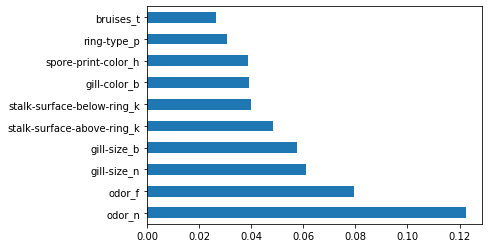

In [47]:
#benim için önemli 10 kolonun hangisi olduğuna bakacağım.
feature_imp.nlargest(10).plot(kind = "barh")

In [50]:
best_feat = feature_imp.nlargest(4).index.to_list()

In [51]:
best_feat

['odor_n', 'odor_f', 'gill-size_n', 'gill-size_b']

In [52]:
X_reduced = X_encoded[best_feat]

In [53]:
X_reduced

,odor_n,odor_f,gill-size_n,gill-size_b
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,1,0,0,1
...,...,...,...,...
8119,1,0,0,1
8120,1,0,0,1
8121,1,0,0,1
8122,0,0,1,0


In [55]:
Xr_scaled = StandardScaler().fit_transform(X_reduced)

In [56]:
Xr_scaled

array([[-0.87614155, -0.60180814,  1.49468272, -1.49468272],
       [-0.87614155, -0.60180814, -0.66903831,  0.66903831],
       [-0.87614155, -0.60180814, -0.66903831,  0.66903831],
       ...,
       [ 1.14136808, -0.60180814, -0.66903831,  0.66903831],
       [-0.87614155, -0.60180814,  1.49468272, -1.49468272],
       [ 1.14136808, -0.60180814, -0.66903831,  0.66903831]])

In [58]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(Xr_scaled, Y, test_size = 0.30, random_state = 101)


In [61]:
start = time.process_time()

rmodel = RandomForestClassifier(n_estimators = 700).fit(Xr_train, Yr_train)

print(time.process_time() - start)

1.359375


In [64]:
rpred = rmodel.predict(Xr_test)
print(confusion_matrix(Yr_test, rpred))
print(classification_report(Yr_test, rpred))

[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           e       0.96      0.98      0.97      1274
           p       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



# Correlation Matrix

In [65]:
import seaborn as sns

In [66]:
X = data.drop(['class'], axis = 1)
Y = data['class']
X_encoded = pd.get_dummies(X, prefix_sep = "_")
Y_encoded = LabelEncoder().fit_transform(Y)
X_encoded["Class"] = Y_encoded

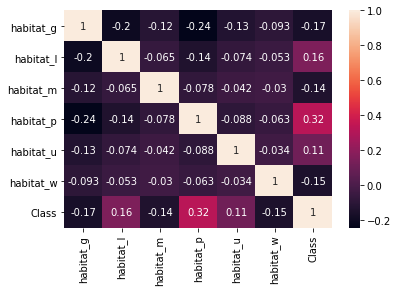

In [69]:
sns.heatmap(X_encoded.iloc[:, -7:].corr(), annot = True)

In [68]:
X_encoded.iloc[:, -7:].corr()

,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Class
habitat_g,1.000000,-0.202512,-0.115762,-0.242715,-0.130592,-0.093276,-0.165004
habitat_l,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553,0.155150
habitat_m,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.138627
habitat_p,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,0.323346
habitat_u,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,0.112078
habitat_w,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.150087
Class,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087,1.000000


In [70]:
X_encoded.corr().abs()['Class'].nlargest(10)

Class                         1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises_f                     0.501530
Name: Class, dtype: float64

In [73]:
X_reduced_col_names = X_encoded.corr().abs()['Class'].nlargest(10).index

In [74]:
X_reduced_col_names

Index(['Class', 'odor_n', 'odor_f', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_n',
       'gill-size_b', 'gill-color_b', 'bruises_f'],
      dtype='object')

In [75]:
X_encoded[X_reduced_col_names].corr()

,Class,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b,bruises_f
Class,1.000000,-0.785557,0.623842,0.587658,0.573524,-0.540469,0.540024,-0.540024,0.538808,0.501530
odor_n,-0.785557,1.000000,-0.527269,-0.466499,-0.471920,0.352151,-0.457211,0.457211,-0.455399,-0.285171
odor_f,0.623842,-0.527269,1.000000,0.584189,0.600449,-0.427514,-0.055394,0.055394,0.079360,0.344642
stalk-surface-above-ring_k,0.587658,-0.466499,0.584189,1.000000,0.677074,-0.549484,0.095225,-0.095225,0.237814,0.541494
stalk-surface-below-ring_k,0.573524,-0.471920,0.600449,0.677074,1.000000,-0.536122,0.089569,-0.089569,0.249536,0.530549
ring-type_p,-0.540469,0.352151,-0.427514,-0.549484,-0.536122,1.000000,-0.308466,0.308466,-0.507885,-0.767036
gill-size_n,0.540024,-0.457211,-0.055394,0.095225,0.089569,-0.308466,1.000000,-1.000000,0.776903,0.369596
gill-size_b,-0.540024,0.457211,0.055394,-0.095225,-0.089569,0.308466,-1.000000,1.000000,-0.776903,-0.369596
gill-color_b,0.538808,-0.455399,0.079360,0.237814,0.249536,-0.507885,0.776903,-0.776903,1.000000,0.438292
bruises_f,0.501530,-0.285171,0.344642,0.541494,0.530549,-0.767036,0.369596,-0.369596,0.438292,1.000000


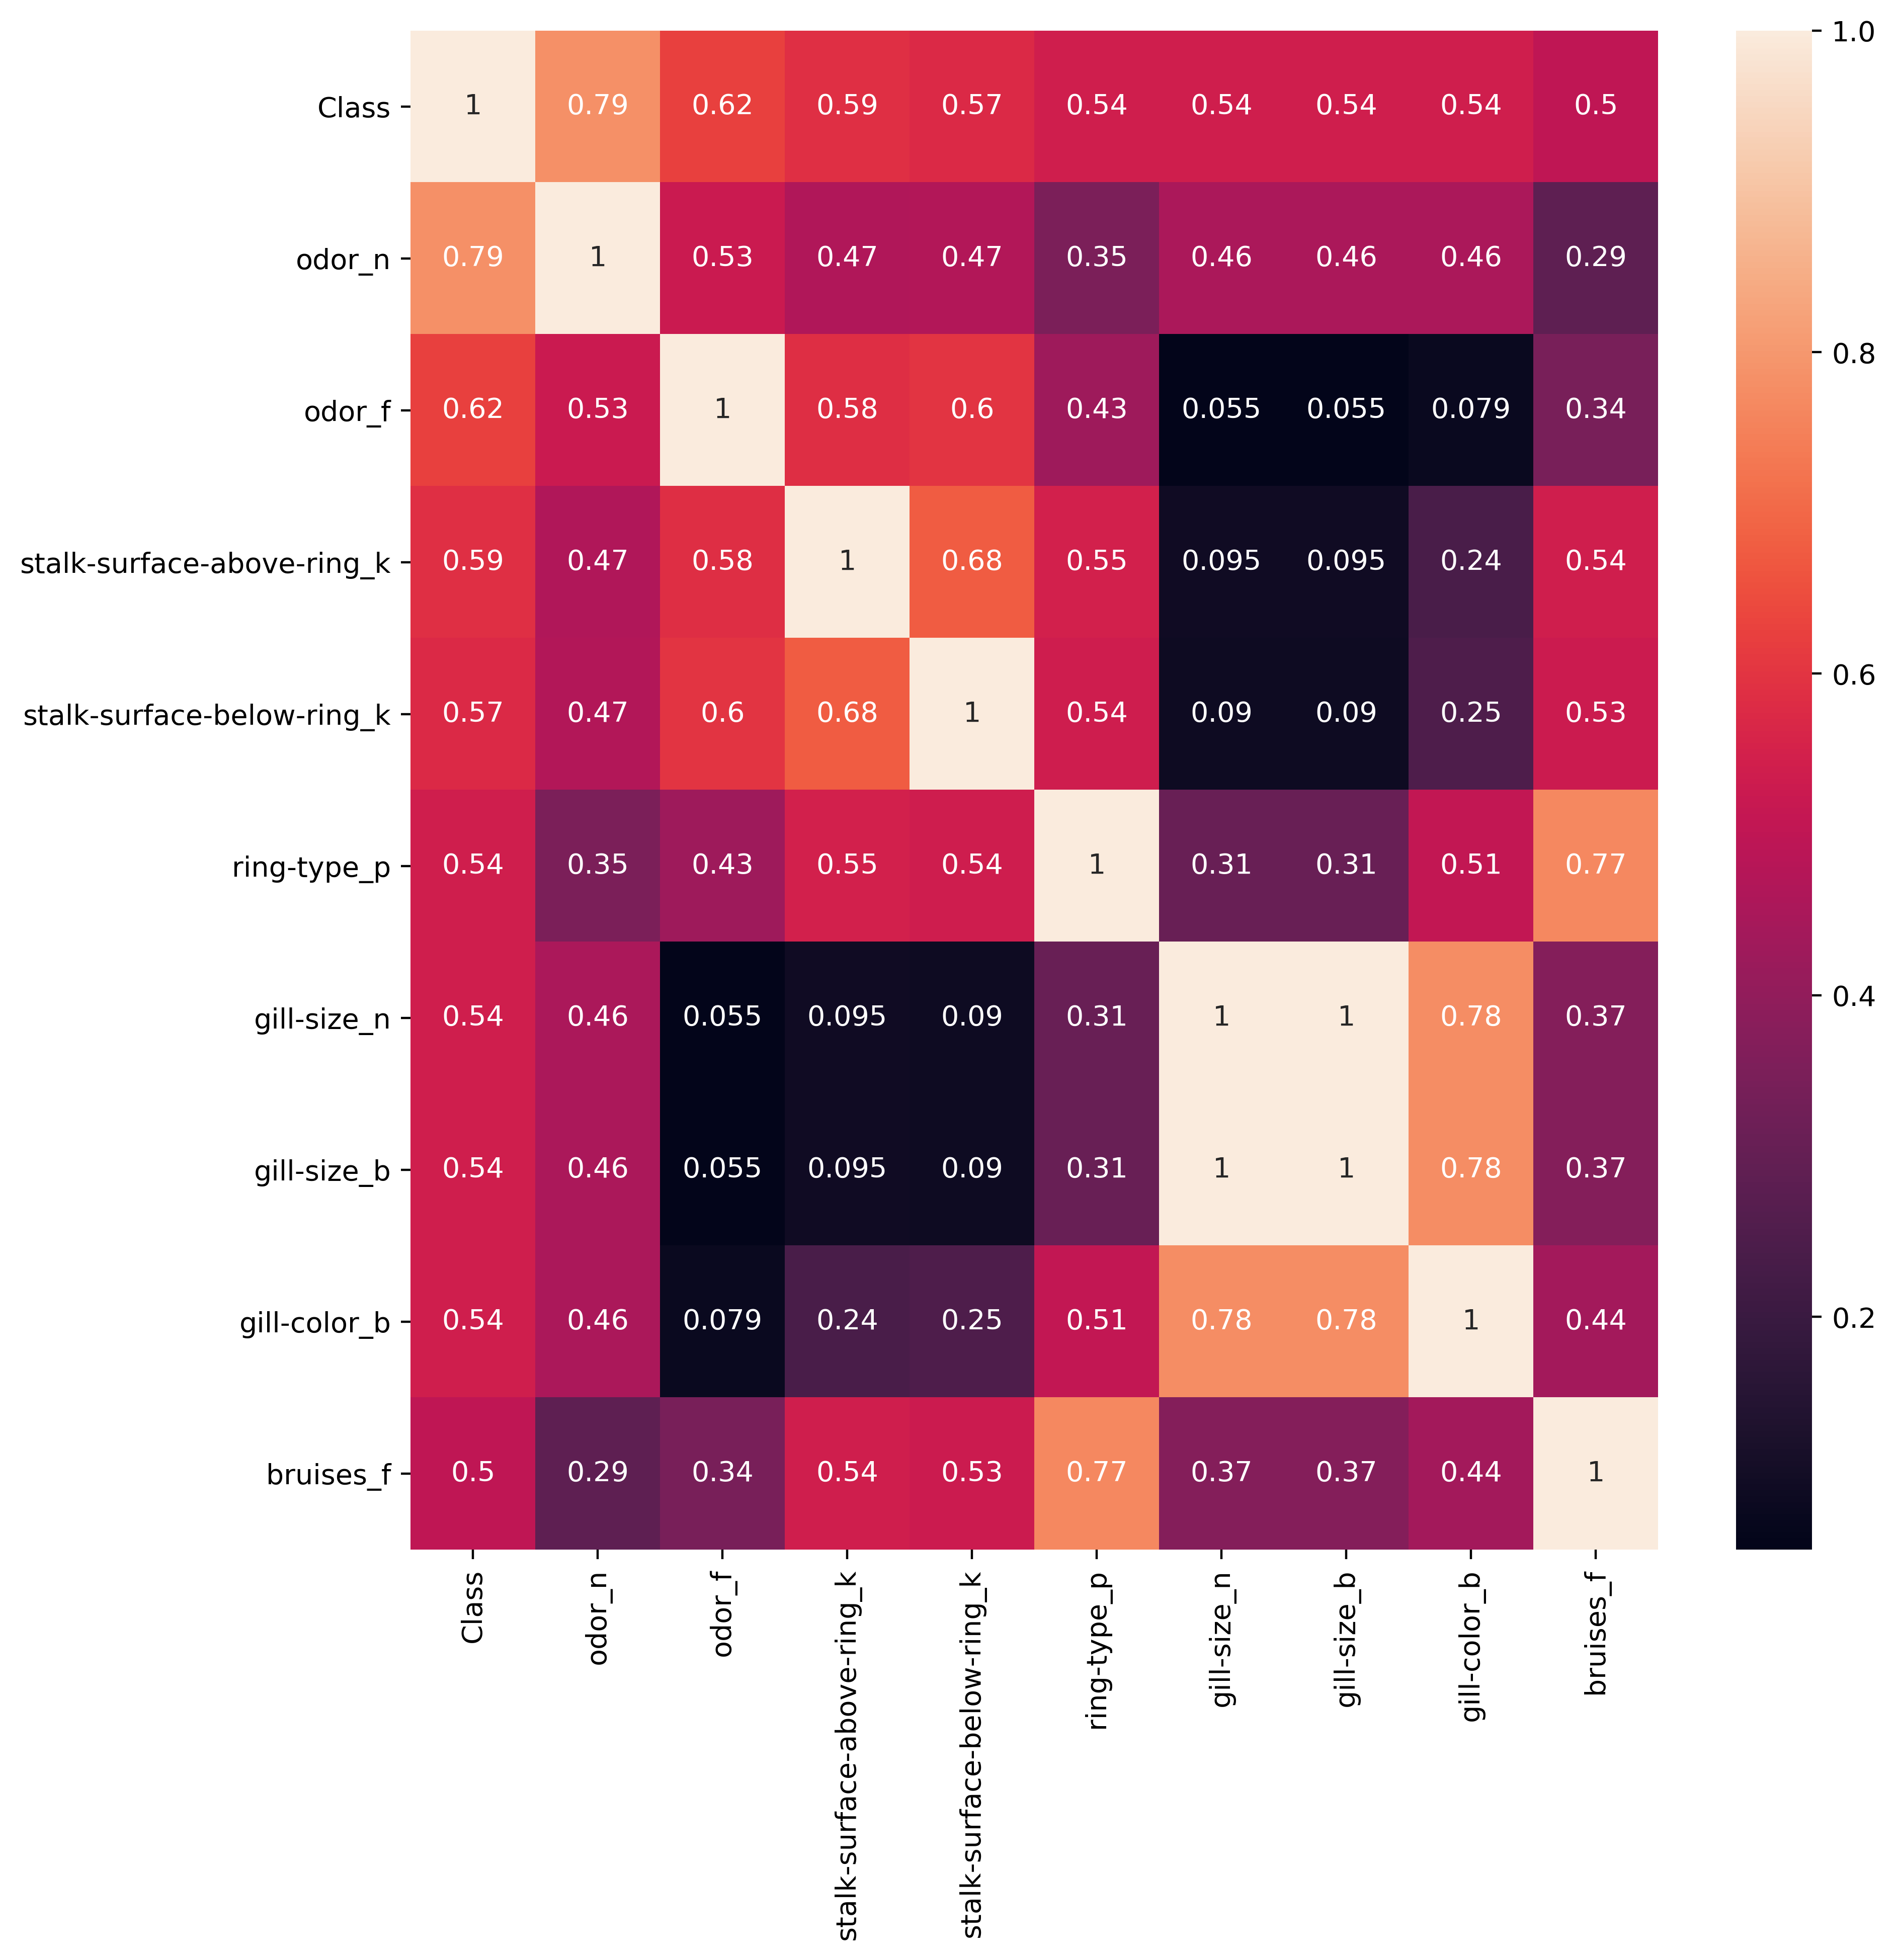

In [77]:
plt.figure(figsize=(10, 10), dpi = 400)
sns.heatmap(X_encoded[X_reduced_col_names].corr().abs(), annot = True)